In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('Advertising.csv')

data.sample(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
134,135,36.9,38.6,65.6,10.8
192,193,17.2,4.1,31.6,5.9
177,178,170.2,7.8,35.2,11.7
44,45,25.1,25.7,43.3,8.5
12,13,23.8,35.1,65.9,9.2
113,114,209.6,20.6,10.7,15.9
189,190,18.7,12.1,23.4,6.7
98,99,289.7,42.3,51.2,25.4
78,79,5.4,29.9,9.4,5.3
92,93,217.7,33.5,59.0,19.4


In [3]:
data.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [4]:
data=data.iloc[:,1:]                 #Dropping the first column

In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
data.isna().sum()                          #Null value checking

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
#importing essential libraries for visualizing the data

import matplotlib.pyplot as plt
import seaborn as sns

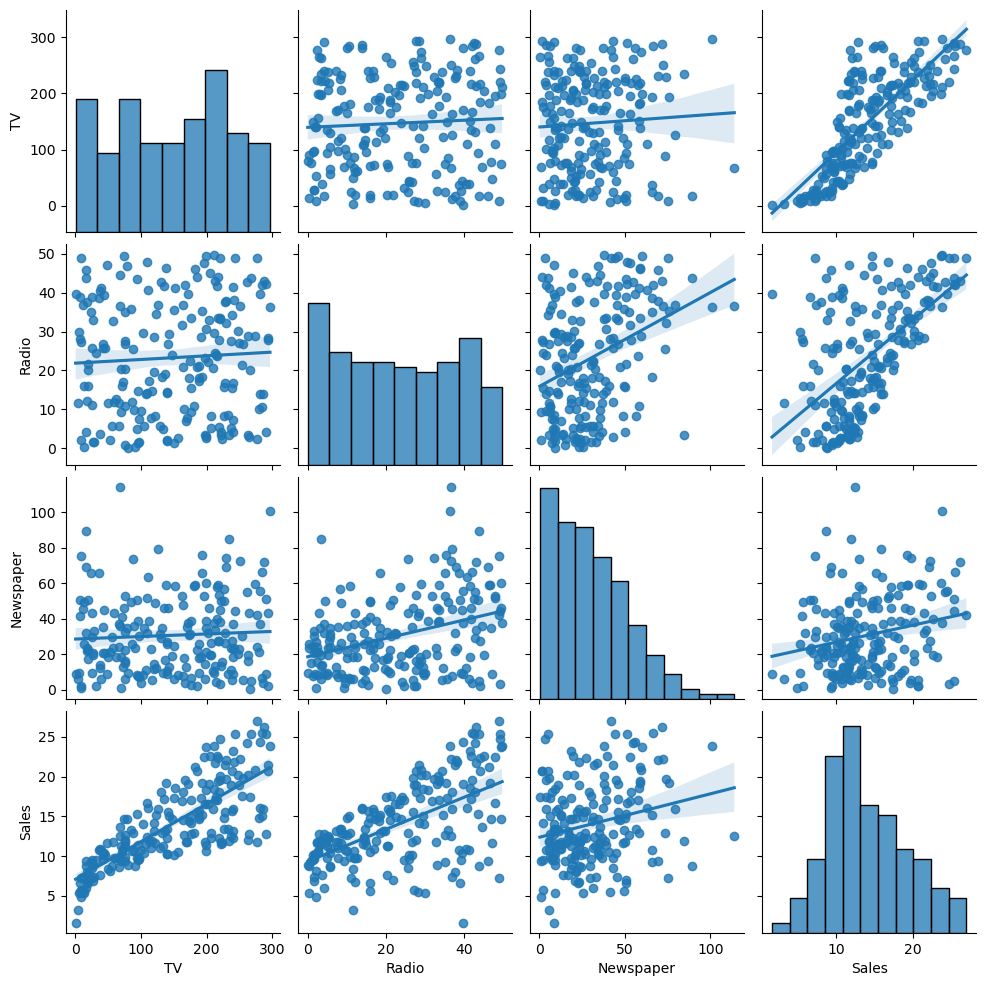

In [9]:
sns.pairplot(data,kind="reg");

In [10]:
fig,axs= plt.subplots(1,3,sharey=True)
data.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(16,8))
data.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
data.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

In [11]:
data=data[data['Newspaper']<=90]                  #Remove outer layer from Newspaper
data.shape

(198, 4)

In [12]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


In [13]:
#Input Data and Output Data split
x=data.drop(columns=['Sales'])
y=data['Sales']

In [14]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [15]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.tail()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
95,163.3,31.6,52.9
5,8.7,48.9,75.0
89,109.8,47.8,51.4
29,70.6,16.0,40.8


In [17]:
y_test.tail()

71     12.4
77     14.2
47     23.2
115    12.6
154    15.6
Name: Sales, dtype: float64

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')
scaler=StandardScaler()
oe=OrdinalEncoder()

In [19]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=10,random_state=0)
pipe=make_pipeline(column_trans,scaler,r)
pipe.fit(x_train,y_train)
y_pred_r=pipe.predict(x_test)
r2_score(y_test,y_pred_r)

0.9707271252733265

In [20]:
pipe.predict([[283.6,42.0,66.2]]) #Original ans 25.5

array([23.57])

In [21]:
pipe.predict([[112.9,17.4,38.6]]) #Original ans 11.9

array([11.96])

In [22]:
import pickle
pickle.dump(pipe,open('sales.pkl','wb'))